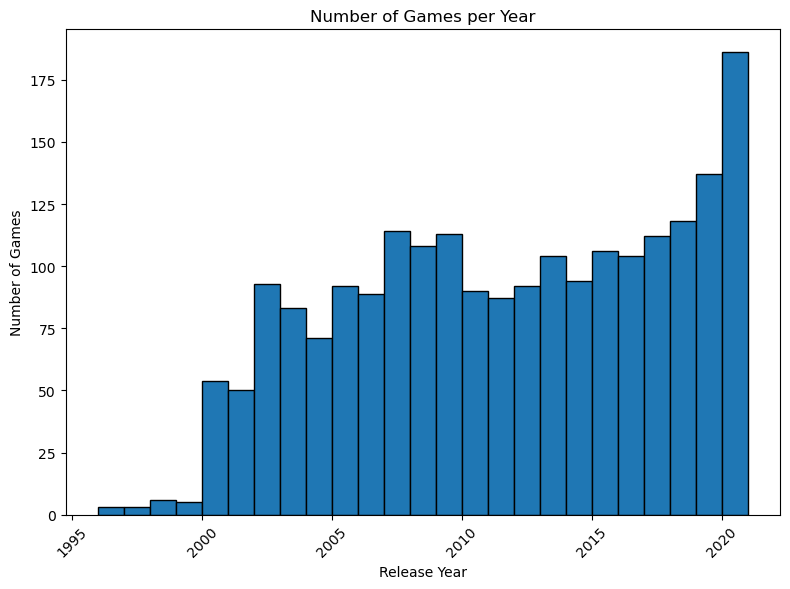

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

metacritic_dataset = pd.read_csv('../datasets/metacritic_games.csv')

# Convert 'Release Date' column to datetime
metacritic_dataset['release_date'] = pd.to_datetime(metacritic_dataset['release_date'])

# Extract the year from 'Release Date' and create a new column 'Release Year'
metacritic_dataset['release_year'] = metacritic_dataset['release_date'].dt.year

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(metacritic_dataset['release_year'], bins=range(min(metacritic_dataset['release_year']), max(metacritic_dataset['release_year']) + 1), edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Number of Games per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#metacritic_dataset.head()

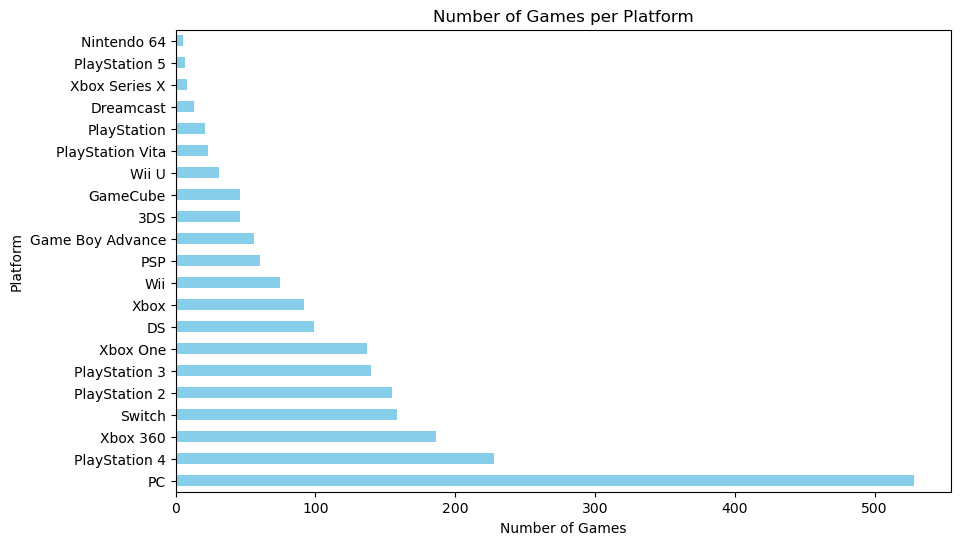

In [8]:
# Count the number of games per platform
platform_counts = metacritic_dataset['platform'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.title('Number of Games per Platform')
plt.show()

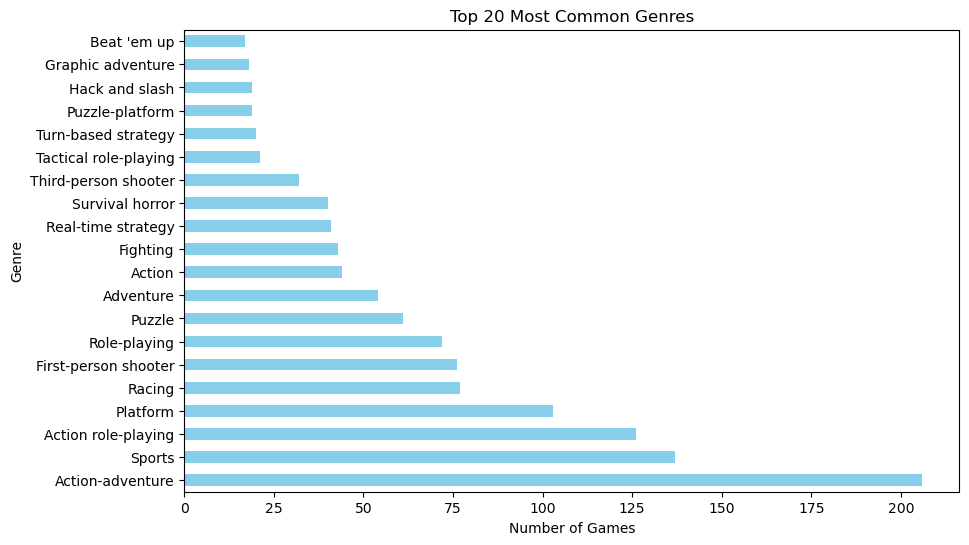

In [9]:
# Count the number of games per genre
genre_counts = metacritic_dataset['Genre'].value_counts()

# Set the number of top genres to display
top_genres = 20  # Change this number to display a different number of genres

# Select the top N most common genres
top_genres_counts = genre_counts.head(top_genres)

# Create a horizontal bar chart for the top N genres
plt.figure(figsize=(10, 6))
top_genres_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.title(f'Top {top_genres} Most Common Genres')
plt.show()

C:\Users\luisk\AppData\Local\Temp\ipykernel_9372\207448726.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metacritic_dataset.loc[:, 'user_review'] = pd.to_numeric(metacritic_dataset['user_review'], errors='coerce')


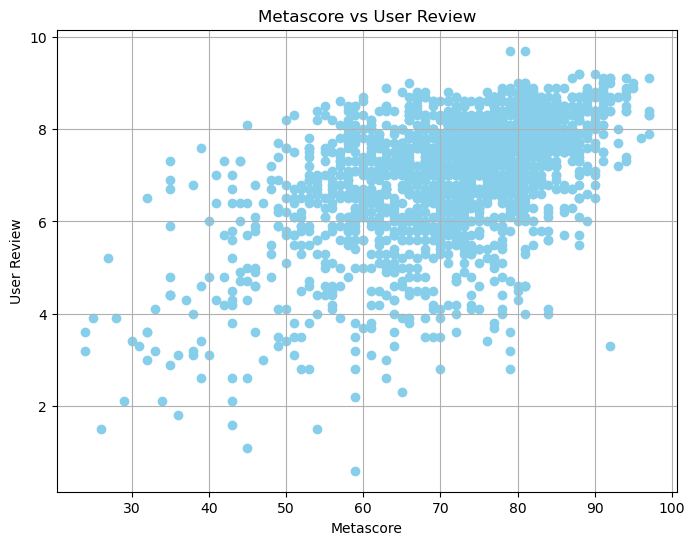

Correlation coefficient: 0.53


In [10]:
# Use .loc to modify the original DataFrame
metacritic_dataset.loc[:, 'user_review'] = pd.to_numeric(metacritic_dataset['user_review'], errors='coerce')

# Drop rows with NaN values in 'User Review' column
metacritic_dataset = metacritic_dataset.dropna(subset=['user_review'])

# Round 'User Review' scores to 1 decimal place
#metacritic_dataset['user_review'] = metacritic_dataset['user_review'].round(1)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(metacritic_dataset['meta_score'], metacritic_dataset['user_review'], color='skyblue')
plt.xlabel('Metascore')
plt.ylabel('User Review')
plt.title('Metascore vs User Review')
plt.grid(True)
plt.show()

correlation = metacritic_dataset['meta_score'].corr(metacritic_dataset['user_review'])
print(f'Correlation coefficient: {correlation:.2f}')


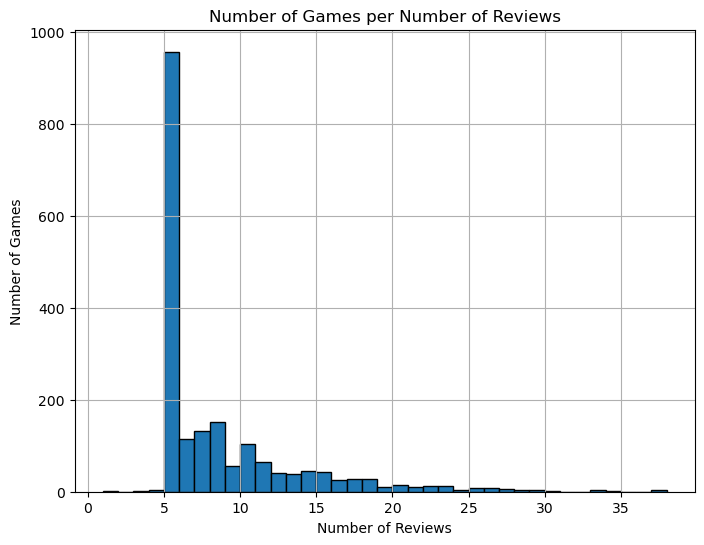

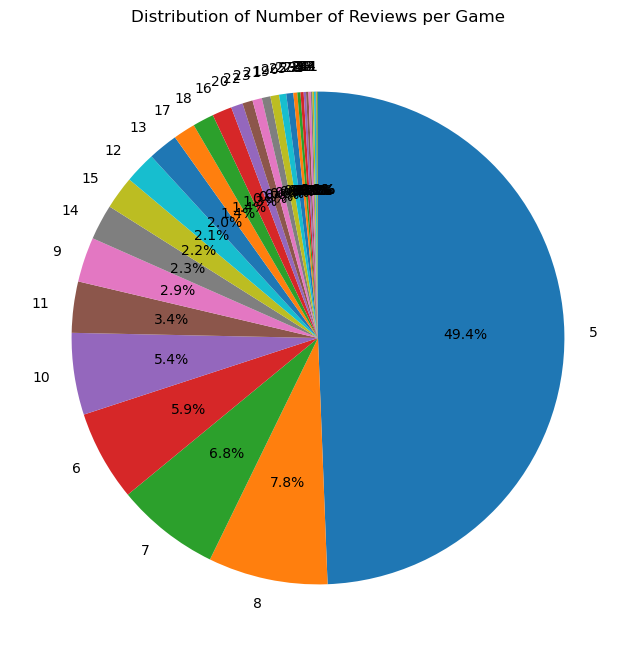

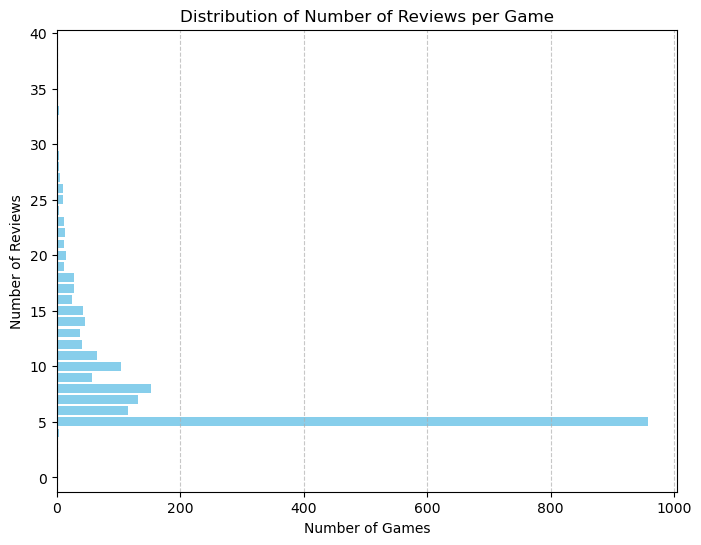

In [11]:
import ast

# Function to count the number of reviews in a list
def count_reviews(review_list):
    # Safely evaluate the string representation of list to a list
    review_list = ast.literal_eval(review_list)
    return len(review_list)

# Apply the function to create a new column 'num_reviews'
metacritic_dataset['num_reviews'] = metacritic_dataset['MetacriticReviews'].apply(count_reviews)

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(metacritic_dataset['num_reviews'], bins=range(min(metacritic_dataset['num_reviews']), max(metacritic_dataset['num_reviews']) + 1), edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Games')
plt.title('Number of Games per Number of Reviews')
plt.grid(True)
plt.show()

# Count the number of games per number of reviews
review_counts = metacritic_dataset['num_reviews'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Number of Reviews per Game')
plt.show()

# Count the number of games per number of reviews
review_counts = metacritic_dataset['num_reviews'].value_counts().sort_index()

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(review_counts.index, review_counts.values, color='skyblue')
plt.xlabel('Number of Games')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews per Game')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [12]:
import ast
from wordcloud import WordCloud

# Function to safely evaluate strings as Python literals
def safe_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return None

# Extract review texts from the tuples (stored as strings) and concatenate them into a single string
review_texts = []
for review_list_str in metacritic_dataset['MetacriticReviews']:
    review_list = safe_eval(review_list_str)
    reviews = ""
    if review_list:
        for _, review_text in review_list:
            if review_text:  # Filter out empty reviews
                reviews = reviews + " " + review_text
    review_texts.append(reviews)

# Fill missing values in 'summary' and 'wikipedia' columns with empty strings
metacritic_dataset['summary'] = metacritic_dataset['summary'].fillna('')
metacritic_dataset['Wikipedia'] = metacritic_dataset['Wikipedia'].fillna('')

# Combine review texts, texts from 'summary', and texts from 'wikipedia' into a single string
combined_text = ' '.join(review_texts + metacritic_dataset['summary'] + metacritic_dataset['Wikipedia'])

# Generate the word cloud from combined_text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [13]:
#WordClouds for Each Column
wordcloudRev = WordCloud(width=800, height=400, background_color='white').generate(review_texts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudRev, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


NameError: name 'WordCloud' is not defined

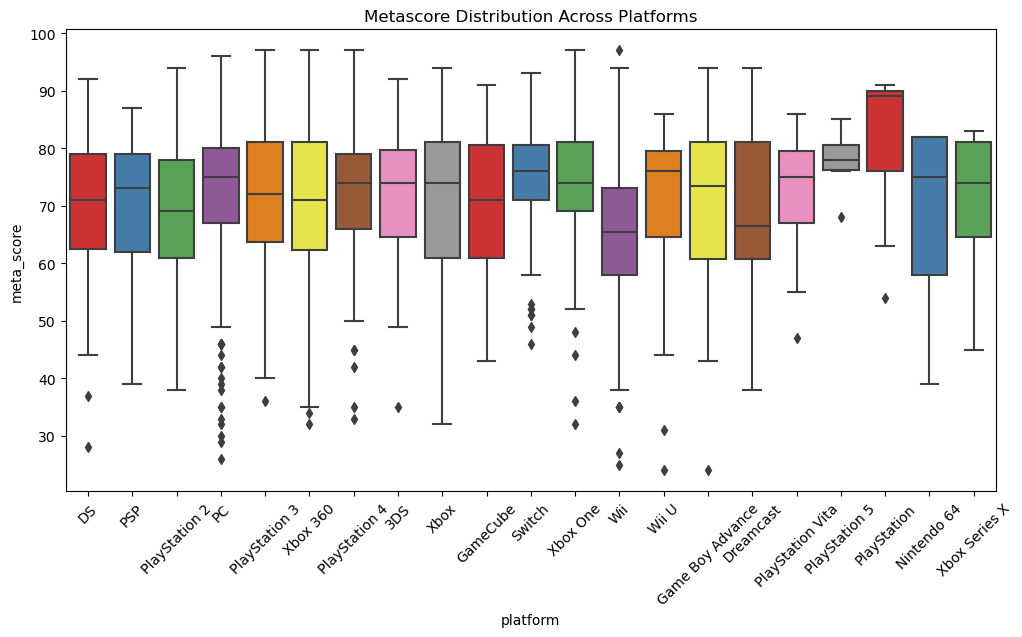

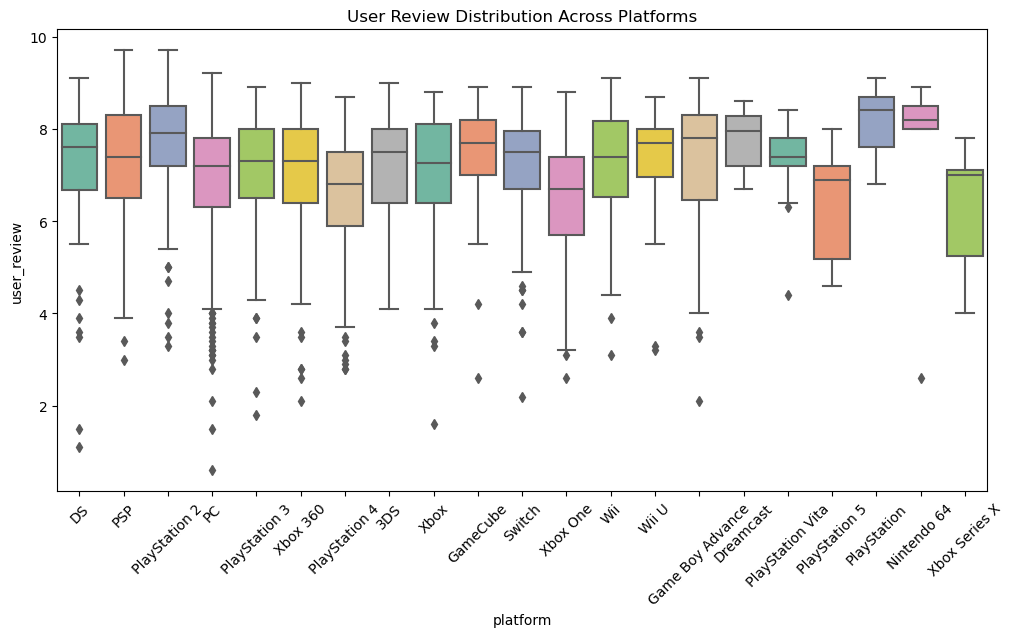

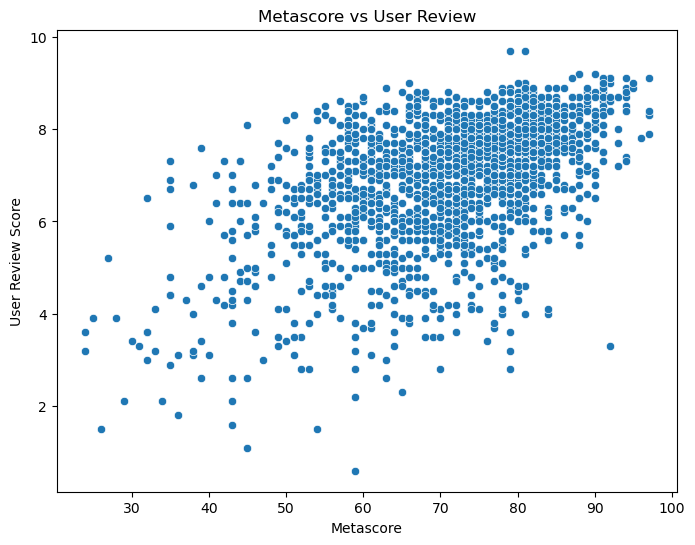

In [14]:
import seaborn as sns

# Box plot comparing metascore and user review scores for different platforms
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='meta_score', data=metacritic_dataset, palette='Set1')
plt.title('Metascore Distribution Across Platforms')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='user_review', data=metacritic_dataset, palette='Set2')
plt.title('User Review Distribution Across Platforms')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to visualize the correlation between metascore and user review scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meta_score', y='user_review', data=metacritic_dataset)
plt.title('Metascore vs User Review')
plt.xlabel('Metascore')
plt.ylabel('User Review Score')
plt.show()
